# Regression und Training von Modellen

### Heute analysieren wir uns Gesundheitsdaten von Rauchern und deren BMI und deren Krankenhauskosten

1. Laden Sie die Daten aus der 'insurance.csv'. Filtern Sie diese nach männlichen Rauchern und extrahieren Sie den BMI als X Wert und die Gesundheitskosten (expenses) als y und sortieren Sie diese nach Datenpunkte nach dem BMI.
2. Implementieren Sie die geschlossene Formel für die lineare Regression und wenden Sie diese auf die von Ihnen generierten Datenpunkte an
3. Implementieren Sie den Batch Gradientenabstieg für das Regressionsproblem (Hinweis: das Problem ist instabil, Parameter die funktionieren sind eta = 0.0001 und n_iterations = 500_000)
4. Implementieren Sie den stoachstischen Gradientenabstieg für das Regressionsproblem (Hinweis: n_epochs = 2500
eta = 0.0001)
5. Vergleichen Sie Ihre Implementierung mit den Ergebnissen der scitkit-learn Implementierung

In [5]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [6]:
insurance = pd.read_csv("data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
male_smokers = insurance[
    (insurance["sex"] == "male") & (insurance["smoker"] == "yes")
].sort_values(by=["bmi"])
male_smokers.head()

,age,sex,bmi,children,smoker,region,expenses
250,18,male,17.3,2,yes,northeast,12829.46
99,38,male,19.3,0,yes,southwest,15820.70
266,40,male,19.8,1,yes,southeast,17179.52
98,56,male,20.0,0,yes,northeast,22412.65
1011,43,male,20.1,2,yes,southeast,18767.74


In [8]:
X = male_smokers["bmi"].to_numpy().reshape(-1, 1)
y = male_smokers["expenses"].to_numpy().reshape(-1, 1)

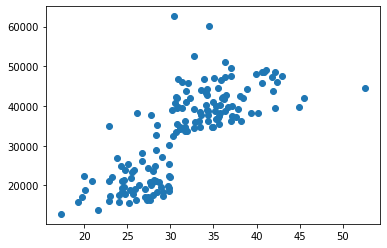

In [9]:
plt.scatter(X, y)

In [12]:
# Wie in der Vorlesung besprochen muss 1 hinzugefügt werden
X_one = np.c_[np.ones((X.shape[0], 1)), X]
X_one[0:5]

array([[ 1. , 17.3],
       [ 1. , 19.3],
       [ 1. , 19.8],
       [ 1. , 20. ],
       [ 1. , 20.1]])

# Geschlossene Lösung

In [17]:
hat_alpha = np.linalg.inv(X_one.T @ X_one) @ X_one.T @ y
hat_alpha

array([[-12591.09536859],
       [  1448.32288433]])

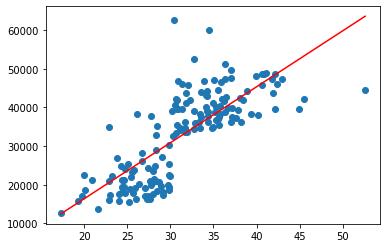

In [8]:
y_reg = X * hat_alpha[1] + hat_alpha[0]

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()

# Gradientenabstieg

In [9]:
%%time

eta = 0.0001
n_iterations = 500_000
m = X.shape[0]
alpha = np.array([[1], [1]])

for iteration in range(n_iterations):
    gradients = 2 / m * X_one.T.dot(X_one.dot(alpha) - y)
    alpha = alpha - eta * gradients

alpha

CPU times: user 2.46 s, sys: 0 ns, total: 2.46 s
Wall time: 2.46 s


array([[-12179.81056253],
       [  1435.71631798]])

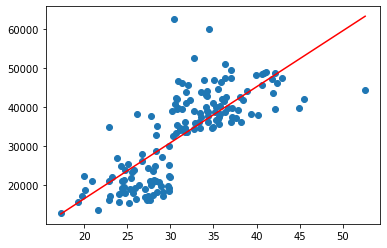

In [10]:
y_reg = X * alpha[1] + alpha[0]

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()

# Stochastischer Gradientenabstieg

In [11]:
%%time
n_epochs = 2500
eta = 0.0001

alpha = np.array([[1], [1]])
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_one[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(alpha) - yi)
        alpha = alpha - eta * gradients
alpha

CPU times: user 3.12 s, sys: 8.95 ms, total: 3.13 s
Wall time: 3.09 s


array([[-11773.56385978],
       [  1266.03658199]])

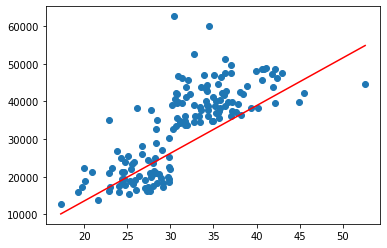

In [12]:
y_reg = X * alpha[1] + alpha[0]

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()

# Scikit Learn Regression

In [13]:
%%time
reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.coef_, reg.intercept_

CPU times: user 674 µs, sys: 0 ns, total: 674 µs
Wall time: 648 µs


(array([[1448.32288433]]), array([-12591.09536859]))

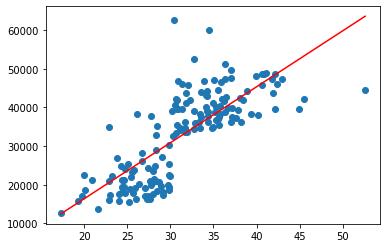

In [14]:
y_reg = X * reg.coef_ + reg.intercept_

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()

# Analyse

Die von hand implementierten Algorithmen sind deutlich langsamer als Scikit-learn und brauchen viel Parameter Tuning um überhaupt zu konvergieren. Die Scitkit-learn Algorithmen sind sehr nah an der geschlossenen Lösung.
